In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#   mH0       mHc       mA0      lamL     fracDM  DDpval ctau[m]  excl  Rvalue   analysis            topology
dt1 = np.dtype([('mH0', float), ('mHc', float), ('mA0', float), ('lamL', float), ('fracDM', float), 
                ('DDpval', float), ('ctau', float), ('ExclStatus', int), ('Rmax', float), 
                ('analysis', 'U40'), ('Tx', 'U80')])

In [3]:
#allPts = np.genfromtxt('randscan2.dat', dtype=dt1, usecols=range(0,11));

In [4]:
allPts1 = np.genfromtxt('randscan1a.dat', dtype=dt1, usecols=range(0,11));
allPts2 = np.genfromtxt('randscan1b.dat', dtype=dt1, usecols=range(0,11));
allPts3 = np.genfromtxt('randscan1c.dat', dtype=dt1, usecols=range(0,11));
allPts4 = np.genfromtxt('randscan1d.dat', dtype=dt1, usecols=range(0,11));
allPts5 = np.genfromtxt('randscan1e.dat', dtype=dt1, usecols=range(0,11));
allPts6 = np.genfromtxt('randscan1f.dat', dtype=dt1, usecols=range(0,11));
allPts7 = np.genfromtxt('randscan1g.dat', dtype=dt1, usecols=range(0,11));

In [5]:
allPts = np.concatenate((allPts1, allPts2, allPts3, allPts4, allPts5, allPts6, allPts7), axis=0)

In [6]:
filterTested = [ (d['ExclStatus']>-1) for d in allPts ]
filterAllowed = [ (d['ExclStatus']<1) for d in allPts ]
filterExcluded = [ (d['ExclStatus']==1) for d in allPts ]
filterNotTested = [ (d['ExclStatus']==-1) for d in allPts ]
testedPts = allPts[filterTested]
allowedPts = allPts[filterAllowed]
exclPts = allPts[filterExcluded]
nontestedPts = allPts[filterNotTested]

In [7]:
[len(allPts),len(testedPts),len(allowedPts),len(exclPts),len(nontestedPts)]

[10366, 10366, 6582, 3784, 0]

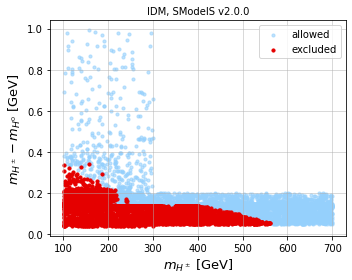

In [8]:
fig = plt.figure(figsize=(5,4))
#plt.yscale('log')
plt.grid(alpha=0.6)
plt.scatter(allowedPts['mHc'],allowedPts['mHc']-allowedPts['mH0'], c='xkcd:light blue', marker="o", s=10, alpha=0.6, label=r'allowed')
plt.scatter(exclPts['mHc'],exclPts['mHc']-exclPts['mH0'], c='xkcd:red', marker="o", s=10, alpha=1, label=r'excluded')
plt.xlabel(r'$m_{H^\pm}$ [GeV]',fontsize=13)
plt.ylabel(r'$m_{H^\pm}-m_{H^0}$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('idm_smoexcl_mHc_deltaM.png', dpi=150)

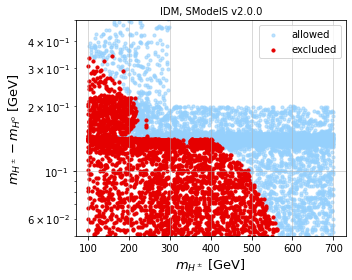

In [9]:
fig = plt.figure(figsize=(5,4))
plt.yscale('log')
plt.ylim(5e-2, 5e-1)
plt.grid(alpha=0.6)
plt.scatter(allowedPts['mHc'],allowedPts['mHc']-allowedPts['mH0'], c='xkcd:light blue', marker="o", s=10, alpha=0.6, label=r'allowed')
plt.scatter(exclPts['mHc'],exclPts['mHc']-exclPts['mH0'], c='xkcd:red', marker="o", s=10, alpha=1, label=r'excluded')
plt.xlabel(r'$m_{H^\pm}$ [GeV]',fontsize=13)
plt.ylabel(r'$m_{H^\pm}-m_{H^0}$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('idm_smoexcl_mHc_deltaM.png', dpi=150)

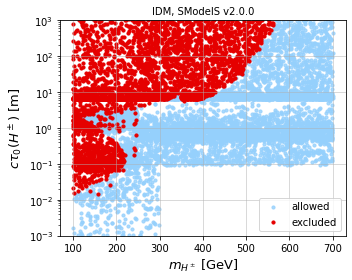

In [12]:
fig = plt.figure(figsize=(5,4))
plt.yscale('log')
plt.ylim(1e-3, 1e3)
plt.grid(alpha=0.6)
plt.scatter(allowedPts['mHc'],allowedPts['ctau'], c='xkcd:light blue', marker="o", s=10, alpha=0.8, label=r'allowed')
plt.scatter(exclPts['mHc'],exclPts['ctau'], c='xkcd:red', marker="o", s=10, alpha=1, label=r'excluded')
plt.xlabel(r'$m_{H^\pm}$ [GeV]',fontsize=13)
plt.ylabel(r'$c\tau_0(H^\pm)$ [m]',fontsize=13)
plt.legend(loc='lower right', frameon=True)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('idm_smoexcl_mHc_ctau.png', dpi=150)

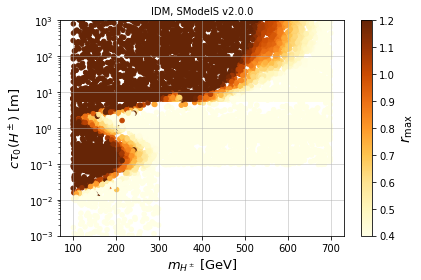

In [11]:
fig = plt.figure(figsize=(6,4))
plt.yscale('log')
plt.ylim(1e-3, 1e3)
plt.grid(alpha=0.6)
plt.scatter(allPts['mHc'],allPts['ctau'], c=allPts['Rmax'], cmap='YlOrBr', s=20, alpha=1, vmin=0.4, vmax=1.2)
cbar = plt.colorbar();
cbar.set_label(r'$r_{\rm max}$', rotation=90,fontsize=14);
plt.xlabel(r'$m_{H^\pm}$ [GeV]',fontsize=13)
plt.ylabel(r'$c\tau_0(H^\pm)$ [m]',fontsize=13)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('idm_rmax_mHc_ctau.png', dpi=150)

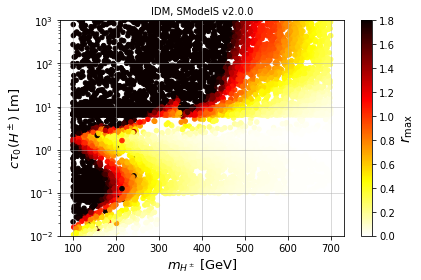

In [13]:
fig = plt.figure(figsize=(6,4))
plt.yscale('log')
plt.ylim(1e-2, 1e3)
plt.grid(alpha=0.6)
plt.scatter(allPts['mHc'],allPts['ctau'], c=allPts['Rmax'], cmap='hot_r', s=20, alpha=1, vmin=0, vmax=1.8)
cbar = plt.colorbar();
cbar.set_label(r'$r_{\rm max}$', rotation=90,fontsize=14);
plt.xlabel(r'$m_{H^\pm}$ [GeV]',fontsize=13)
plt.ylabel(r'$c\tau_0(H^\pm)$ [m]',fontsize=13)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('idm_rmax_mHc_ctau.png', dpi=150)

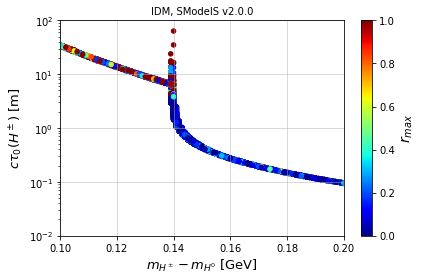

In [14]:
fig = plt.figure(figsize=(6,4))
#plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1, 0.2)
plt.ylim(1e-2, 1e2)
plt.grid(alpha=0.6)
plt.scatter(allPts['mHc']-allPts['mH0'], allPts['ctau'], c=allPts['Rmax'], cmap='jet', s=20, alpha=1, vmin=0, vmax=1)
cbar = plt.colorbar();
cbar.set_label(r'$r_{max}$', rotation=90,fontsize=14);
plt.xlabel(r'$m_{H^\pm}-m_{H^0}$ [GeV]',fontsize=13)
plt.ylabel(r'$c\tau_0(H^\pm)$ [m]',fontsize=13)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()

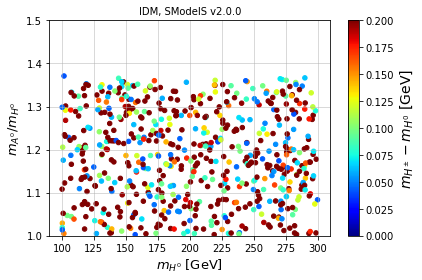

In [15]:
fig = plt.figure(figsize=(6,4))
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim(0.05, 0.4)
plt.ylim(1, 1.5)
plt.grid(alpha=0.6)
plt.scatter(allPts1['mH0'], allPts1['mA0']/allPts1['mH0'], c=allPts1['mHc']-allPts1['mH0'], cmap='jet', s=20, alpha=1, vmin=0.2, vmax=0)
cbar = plt.colorbar();
cbar.set_label(r'$m_{H^\pm}-m_{H^0}$ [GeV]', rotation=90,fontsize=14);
plt.xlabel(r'$m_{H^0}$ [GeV]',fontsize=13)
plt.ylabel(r'$m_{A^0}/m_{H^0}$',fontsize=13)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
np.unique(exclPts['analysis'],return_counts = True)

(array(['ATLAS-SUSY-2016-06', 'ATLAS-SUSY-2016-32', 'CMS-EXO-13-006',
        'CMS-PAS-EXO-16-036'], dtype='<U40'),
 array([ 760, 1191, 1832,    1]))

In [17]:
DTpts = exclPts[ [ (d['analysis']=='ATLAS-SUSY-2016-06') for d in exclPts ] ]
HSCPpts = exclPts[ [ (d['analysis']=='ATLAS-SUSY-2016-32' or d['analysis']=='CMS-EXO-13-006') for d in exclPts ] ]
[len(DTpts),len(HSCPpts)]

[760, 3023]

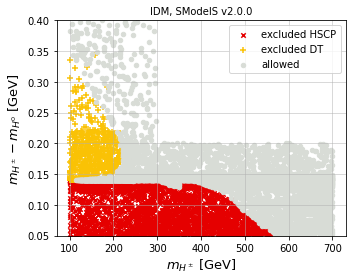

In [18]:
fig = plt.figure(figsize=(5,4))
#plt.yscale('log')
plt.ylim(0.05, 0.4)
plt.grid(alpha=0.6)
plt.scatter(HSCPpts['mHc'],HSCPpts['mHc']-HSCPpts['mH0'], c='xkcd:red', marker="x", s=20, alpha=1, label=r'excluded HSCP')
plt.scatter(DTpts['mHc'],DTpts['mHc']-DTpts['mH0'], c='xkcd:goldenrod', marker="+", s=30, alpha=1, label=r'excluded DT')
plt.scatter(allowedPts['mHc'],allowedPts['mHc']-allowedPts['mH0'], c='xkcd:light grey', marker="o", s=20, alpha=1, label=r'allowed')
plt.xlabel(r'$m_{H^\pm}$ [GeV]',fontsize=13)
plt.ylabel(r'$m_{H^\pm}-m_{H^0}$ [GeV]',fontsize=13)
plt.legend(loc='upper right', frameon=True)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('idm_smoexcl_mHc_deltaM.png', dpi=150)

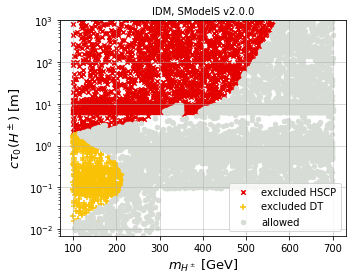

In [19]:
fig = plt.figure(figsize=(5,4))
plt.yscale('log')
#plt.xlim(80, 620)
plt.ylim(7e-3, 1e3)
plt.grid(alpha=0.6)
plt.scatter(HSCPpts['mHc'],HSCPpts['ctau'], c='xkcd:red', marker="x", s=20, alpha=1, label=r'excluded HSCP')
plt.scatter(DTpts['mHc'],DTpts['ctau'], c='xkcd:goldenrod', marker="+", s=30, alpha=1, label=r'excluded DT')
plt.scatter(allowedPts['mHc'],allowedPts['ctau'], c='xkcd:light grey', marker="o", s=20, alpha=1, label=r'allowed')
plt.xlabel(r'$m_{H^\pm}$ [GeV]',fontsize=13)
plt.ylabel(r'$c\tau_0(H^\pm)$ [m]',fontsize=13)
plt.legend(loc='lower right', frameon=True)
plt.title(r'IDM, SModelS v2.0.0',loc='center',fontsize=10)
plt.tight_layout()
plt.show()
#fig.savefig('idm_smoexcl_mHc_ctau.png', dpi=150)